In [205]:
import csv
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder#더미변수화 패키지 
from sklearn.metrics import classification_report
import numpy as np
import sklearn as sk
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

after_data= pd.read_csv("C:/Users/USER/final_Data.csv",header = 0)
before_data=pd.read_csv("C:/Users/USER/Desktop/before_churn2.csv")

data1=pd.read_csv("C:/Users/USER/Desktop/churn_data_python.csv") 


import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
    plt.show()

#결측치? 제거한 데이터
data=pd.read_csv("C:/Users/USER/Desktop/churn_data_python - 복사본.csv") 
data.dropna(axis=0)
data2=pd.read_csv("C:/Users/USER/Desktop/churn_data_python - 복사본.csv") 
data2.dropna(axis=0)
# len(data)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Days_from,time_from_last_visit
0,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,...,6.000000,567.660000,No,Yes,Yes,Unsolved,Poor Website,5,428,249
1,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,...,16.000000,663.060000,No,Yes,Yes,Solved,Poor Website,5,110,465
2,60,M,City,Gold Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,14,55.53,...,33.024343,798.120000,Yes,No,No,Not Applicable,Too many ads,3,718,325
3,43,M,City,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,17,108.30,...,21.000000,225.004428,No,Yes,No,Not Applicable,Poor Website,4,870,402
4,17,F,City,No Membership,Yes,Without Offers,Desktop,Fiber_Optic,20,162.93,...,11.000000,633.050000,No,Yes,Yes,Solved,Too many ads,5,767,459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,54,F,Village,No Membership,No,Without Offers,Desktop,Mobile_Data,9,50.27,...,5.000000,380.050136,No,Yes,No,Not Applicable,Too many ads,4,236,205
18664,64,F,Village,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,17,159.36,...,10.000000,1251.708596,Yes,No,Yes,Solved,Poor Customer Service,5,796,406
18665,42,M,Village,Platinum Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,7,92.61,...,27.839927,771.660000,No,Yes,No,Not Applicable,Products always in Stock,2,478,149
18666,12,F,Village,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,13,418.38,...,7.000000,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock,2,432,309


## 1. 데이터전처리

In [206]:
#범주형 데이터 라벨링
le = LabelEncoder()
le.fit(data["gender"])
data["gender"]= le.transform(data["gender"])
le.fit(data["region_category"])
data["region_category"]= le.transform(data["region_category"])
le.fit(data["membership_category"])
data["membership_category"]= le.transform(data["membership_category"])
le.fit(data["joined_through_referral"])
data["joined_through_referral"]= le.transform(data["joined_through_referral"])
le.fit(data["preferred_offer_types"])
data["preferred_offer_types"]= le.transform(data["preferred_offer_types"])
le.fit(data["medium_of_operation"])
data["medium_of_operation"]= le.transform(data["medium_of_operation"])
le.fit(data["internet_option"])
data["internet_option"]= le.transform(data["internet_option"])
le.fit(data["used_special_discount"])
data["used_special_discount"]= le.transform(data["used_special_discount"])
le.fit(data["offer_application_preference"])
data["offer_application_preference"]= le.transform(data["offer_application_preference"])
le.fit(data["past_complaint"])
data["past_complaint"]= le.transform(data["past_complaint"])
le.fit(data["complaint_status"])
data["complaint_status"]= le.transform(data["complaint_status"])
le.fit(data["feedback"])
data["feedback"]= le.transform(data["feedback"])


In [207]:
data1= pd.get_dummies(data2[["gender","region_category","membership_category","joined_through_referral",
                           "preferred_offer_types","medium_of_operation","internet_option","used_special_discount",
                           "offer_application_preference","past_complaint","complaint_status","feedback"]])
result=pd.concat([data2,data1], axis=1)
dummy_data= result.drop(columns=["gender","region_category","membership_category","joined_through_referral",
                           "preferred_offer_types","medium_of_operation","internet_option","used_special_discount",
                           "offer_application_preference","past_complaint","complaint_status","feedback"])



# 2.train/test 데이터 나누기

In [208]:
y= data["churn_risk_score"]
x =data.drop(columns=["churn_risk_score"], axis=1)
print(data.info())
print("*******************************************************************************")
dummy_y= dummy_data["churn_risk_score"]
dummy_x =dummy_data.drop(columns=["churn_risk_score"], axis=1)
print(dummy_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18668 entries, 0 to 18667
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           18668 non-null  int64  
 1   gender                        18668 non-null  int32  
 2   region_category               18668 non-null  int32  
 3   membership_category           18668 non-null  int32  
 4   joined_through_referral       18668 non-null  int32  
 5   preferred_offer_types         18668 non-null  int32  
 6   medium_of_operation           18668 non-null  int32  
 7   internet_option               18668 non-null  int32  
 8   days_since_last_login         18668 non-null  int64  
 9   avg_time_spent                18668 non-null  float64
 10  avg_transaction_value         18668 non-null  float64
 11  avg_frequency_login_days      18668 non-null  float64
 12  points_in_wallet              18668 non-null  float64
 13  u

In [209]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.75, random_state=0)

dx_train, dx_test, dy_train, dy_test = train_test_split(dummy_x,dummy_y,test_size=0.75, random_state=0)

# 3.모델 구축

## 1)다항로지스틱

In [210]:

logi = LogisticRegression(random_state=0, C=10000,solver='newton-cg', multi_class="multinomial").fit(x_train, y_train)
predicted = logi.predict(x_test)

d_logi = LogisticRegression(random_state=0, C=10000,solver='newton-cg', multi_class="multinomial").fit(dx_train, dy_train)
d_predicted = d_logi.predict(dx_test)


C:\pythontemp\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\pythontemp\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [211]:
print( pd.crosstab(predicted, y_test) )
print("=====================================================")
print(classification_report(y_test, predicted))


print("*******************************************************************************")
print( pd.crosstab(d_predicted, dy_test) )
print("=====================================================")
print(classification_report(dy_test, d_predicted))


churn_risk_score    1    2     3     4     5
row_0                                       
1                 291  165    49    63    37
2                 360  484   143    80    56
3                 278  263  2763  1077   184
4                 102   69   643  1018  1261
5                  54   72   506  1727  2256
              precision    recall  f1-score   support

           1       0.48      0.27      0.34      1085
           2       0.43      0.46      0.44      1053
           3       0.61      0.67      0.64      4104
           4       0.33      0.26      0.29      3965
           5       0.49      0.59      0.54      3794

    accuracy                           0.49     14001
   macro avg       0.47      0.45      0.45     14001
weighted avg       0.47      0.49      0.47     14001

*******************************************************************************
churn_risk_score    1    2     3     4     5
row_0                                       
1                 681  393

In [221]:
print("로지스틱:{:.5}".format(logi.score(x_train, y_train)))
print("로지스틱:{:.5}".format(logi.score(x_test, y_test)))
print("*******************************************************************************")
print("더미변수 로지스틱:{:.5}".format(d_logi.score(dx_train, dy_train)))
print("더미변수 로지스틱:{:.5}".format(d_logi.score(dx_test, dy_test)))

로지스틱:0.49625
로지스틱:0.48654
*******************************************************************************
더미변수 로지스틱:0.72638
더미변수 로지스틱:0.70024


## 2)배깅

In [174]:
# data =data.drop(columns=["past_complaint"], axis=1)
# data =data.drop(columns=["offer_application_preference"], axis=1)
# data =data.drop(columns=["gender"], axis=1)
# data =data.drop(columns=["joined_through_referral"], axis=1)
# data =data.drop(columns=["medium_of_operation"], axis=1)
# data =data.drop(columns=["complaint_status"], axis=1)
# data =data.drop(columns=["internet_option"], axis=1)
# data =data.drop(columns=["preferred_offer_types"], axis=1)
# data =data.drop(columns=["days_since_last_login"], axis=1)
# data =data.drop(columns=["feedback"], axis=1)
# data =data.drop(columns=["complaint_status"], axis=1)
# data =data.drop(columns=["age"], axis=1)
# data =data.drop(columns=["time_from_last_visit"], axis=1)
# data =data.drop(columns=["Days_from"], axis=1)
# data =data.drop(columns=["avg_time_spent"], axis=1)

# print(x.shape)

# print(data.info())
# y= data["churn_risk_score"]
# y = pd.get_dummies(y)
# x =data.drop(columns=["churn_risk_score"], axis=1)
# result2["region_category_City"]=pd.to_numeric(result2["region_category_City"])
# result2["gender_M"].astype(int)
# print(y.shape)
# print(data.info())


# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.6, random_state=0)
# x_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18668 entries, 0 to 18667
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             18668 non-null  int64  
 1   days_since_last_login                           18668 non-null  int64  
 2   avg_time_spent                                  18668 non-null  float64
 3   avg_transaction_value                           18668 non-null  float64
 4   avg_frequency_login_days                        18668 non-null  float64
 5   points_in_wallet                                18668 non-null  float64
 6   churn_risk_score                                18668 non-null  int64  
 7   Days_from                                       18668 non-null  int64  
 8   time_from_last_visit                            18668 non-null  int64  
 9   gender_F                               

In [213]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
# "age","gender","region_category","membership_category","joined_through_referral","preferred_offer_types","medium_of_operation","internet_option","days_since_last_login","avg_time_spent","avg_transaction_value","avg_frequency_login_days","points_in_wallet","used_special_discount","offer_application_preference","past_complaint","complaint_status","feedback","Days_from","time_from_last_visit"




# dt_model= DecisionTreeClassifier(random_state=1).fit(x_train, y_train)
# ensemble100 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
#                             n_estimators=100,
#                             n_jobs=-1,
#                             max_samples=0.5,
#                             max_features=0.5,
#                             random_state=1).fit(x_train,y_train)

bagging = BaggingClassifier().fit(x_train,y_train)
bagg_predicted = bagging.predict(x_test)
print( pd.crosstab(bagg_predicted, y_test) )
print("=====================================================")
print(classification_report(y_test, bagg_predicted))


#더비변수 배깅
print("************************************************************")
d_bagging = BaggingClassifier().fit(dx_train,dy_train)
d_bagg_predicted = d_bagging.predict(dx_test)
print( pd.crosstab(d_bagg_predicted, dy_test) )
print("=====================================================")
print(classification_report(y_test, d_bagg_predicted))

churn_risk_score    1    2     3     4     5
row_0                                       
1                 799  239     2     2     0
2                 253  772     4     2     0
3                  16   26  3735   271    28
4                   6   13   344  2816   995
5                  11    3    19   874  2771
              precision    recall  f1-score   support

           1       0.77      0.74      0.75      1085
           2       0.75      0.73      0.74      1053
           3       0.92      0.91      0.91      4104
           4       0.67      0.71      0.69      3965
           5       0.75      0.73      0.74      3794

    accuracy                           0.78     14001
   macro avg       0.77      0.76      0.77     14001
weighted avg       0.78      0.78      0.78     14001

************************************************************
churn_risk_score    1    2     3     4     5
row_0                                       
1                 730  231    17     1     1


In [214]:
print("배깅:", bagging.score(x_train, y_train))
print("배깅:", bagging.score(x_test, y_test))
print("*********************************************************")
print("더비변수 배깅:", d_bagging.score(dx_train, dy_train))
print("더비변수 배깅:", d_bagging.score(dx_test, dy_test))

배깅: 0.9920719948575102
배깅: 0.778015856010285
*********************************************************
더비변수 배깅: 0.9914291836297408
더비변수 배깅: 0.7734447539461468


배깅 특성 중요도
[0.02762965 0.00529047 0.00763427 0.15845836 0.00392862 0.00744644
 0.0067508  0.00638135 0.01070064 0.03547039 0.03909821 0.02422371
 0.42662875 0.00217077 0.00243216 0.00260513 0.00840017 0.16037867
 0.03692547 0.02744596]


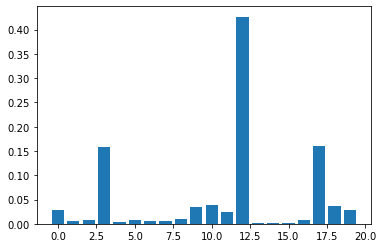

******************************************************
더미변수 배깅 특성 중요도
[0.02745164 0.01080338 0.03283116 0.10430634 0.02603938 0.42871234
 0.03194403 0.01835548 0.00233284 0.0024569  0.00379317 0.00214822
 0.00289204 0.02191806 0.03296554 0.02426286 0.02089374 0.01684116
 0.03504107 0.002      0.00232068 0.00293446 0.00431913 0.0027332
 0.00201495 0.00198565 0.00205643 0.0026513  0.00294008 0.00297368
 0.00154926 0.00087668 0.0016828  0.00119436 0.00093928 0.00144364
 0.00183583 0.001301   0.00346504 0.00249196 0.00189209 0.00369234
 0.00349279 0.00201672 0.00259679 0.02090277 0.02410896 0.02141665
 0.00214175 0.02604041]


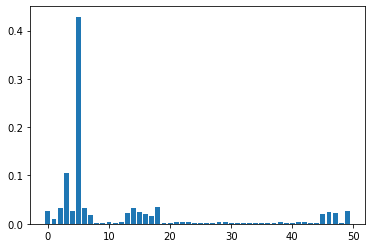

In [243]:
print("배깅 특성 중요도")
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging.estimators_
], axis=0)
print(feature_importances)
pyplot.bar([x for x in range(len(feature_importances))], feature_importances)
pyplot.show()

print("******************************************************")
print("더미변수 배깅 특성 중요도")
d_feature_importances = np.mean([
    tree.feature_importances_ for tree in d_bagging.estimators_
], axis=0)
print(d_feature_importances)
pyplot.bar([x for x in range(len(d_feature_importances))], d_feature_importances)
pyplot.show()



# 3)랜덤포레스트

In [216]:
random_model = RandomForestClassifier(n_estimators=100, max_depth=15).fit(x_train, y_train)
d_random_model = RandomForestClassifier(n_estimators=100, max_depth=15).fit(dx_train, dy_train)

print("random_forest:", random_model.score(x_train, y_train))
print("random_forest:", random_model.score(x_test, y_test))
print("**************************************************")
print("d_random_forest:", d_random_model.score(dx_train, dy_train))
print("d_random_forest:", d_random_model.score(dx_test, dy_test))

random_forest: 0.9997857295907435
random_forest: 0.777587315191772
**************************************************
d_random_forest: 0.9980715663166917
d_random_forest: 0.7818727233769016


랜덤포레스트 특성 중요도 : 
[0.03464104 0.00744262 0.01117549 0.18685249 0.00663202 0.01132818
 0.01049326 0.01117266 0.02709313 0.04112526 0.09044925 0.04535949
 0.31103653 0.00574905 0.00606071 0.00622893 0.0139178  0.09448614
 0.0401556  0.03860033]


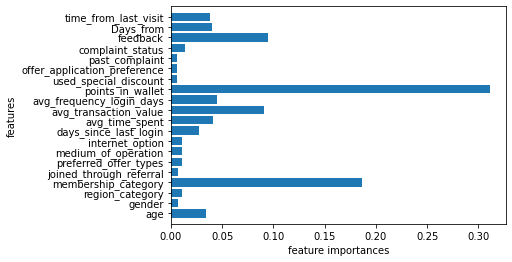

*************************************************
더미변수 랜덤포레스트 특성 중요도
Feature: 0, Score: 0.02696
Feature: 1, Score: 0.02141
Feature: 2, Score: 0.02994
Feature: 3, Score: 0.07584
Feature: 4, Score: 0.03669
Feature: 5, Score: 0.23402
Feature: 6, Score: 0.03009
Feature: 7, Score: 0.03005
Feature: 8, Score: 0.00465
Feature: 9, Score: 0.00494
Feature: 10, Score: 0.00525
Feature: 11, Score: 0.00486
Feature: 12, Score: 0.00385
Feature: 13, Score: 0.06911
Feature: 14, Score: 0.02757
Feature: 15, Score: 0.07987
Feature: 16, Score: 0.03432
Feature: 17, Score: 0.03433
Feature: 18, Score: 0.02755
Feature: 19, Score: 0.00455
Feature: 20, Score: 0.00419
Feature: 21, Score: 0.00445
Feature: 22, Score: 0.00524
Feature: 23, Score: 0.00465
Feature: 24, Score: 0.00323
Feature: 25, Score: 0.00477
Feature: 26, Score: 0.00473
Feature: 27, Score: 0.00523
Feature: 28, Score: 0.00481
Feature: 29, Score: 0.00485
Feature: 30, Score: 0.00361
Feature: 31, Score: 0.00392
Feature: 32, Score: 0.00376
Feature: 33, Scor

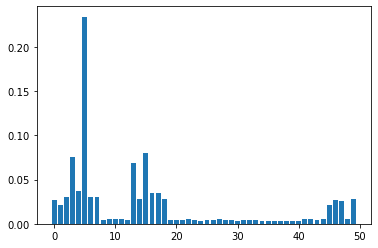

In [231]:
# data=data.drop(columns=["time_from_last_visit"], axis=1)
# data =data.drop(columns=["gender_F"], axis=1)
# data =data.drop(columns=["gender_M"], axis=1)
# data =data.drop(columns=["region_category_City"], axis=1)
# data =data.drop(columns=["gender"], axis=1)
# data =data.drop(columns=["region_category"], axis=1)
# data =data.drop(columns=["joined_through_referral"], axis=1)
# data =data.drop(columns=["preferred_offer_types"], axis=1)
# data =data.drop(columns=["medium_of_operation"], axis=1)
# data =data.drop(columns=["internet_option"], axis=1)
# data =data.drop(columns=["complaint_status"], axis=1)
# data =data.drop(columns=["age"], axis=1)
# data =data.drop(columns=["time_from_last_visit"], axis=1)
# data =data.drop(columns=["Days_from"], axis=1)
# data =data.drop(columns=["avg_time_spent"], axis=1)
# data =data.drop(columns=["avg_frequency_login_days"], axis=1)


# print(data.info())


# 특성 중요도
print("랜덤포레스트 특성 중요도 : \n{}".format(random_model.feature_importances_))

# 특성 중요도 시각화 하기
plot_feature_importances(random_model)
print("*************************************************")

# 특성 중요도
# print("더미변수 랜덤포레스트 특성 중요도 : \n{}".format(d_random_model.feature_importances_))

# 특성 중요도 시각화 하기
print("더미변수 랜덤포레스트 특성 중요도")
d_importance = d_random_model.feature_importances_
for i,v in enumerate(d_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(d_importance))], d_importance)
pyplot.show()

# 4)부스팅

In [225]:

boosting_model= GradientBoostingClassifier()
boosting_model.fit(x_train, y_train)


d_boosting_model= GradientBoostingClassifier()
d_boosting_model.fit(dx_train, dy_train)


print("boosting:", boosting_model.score(x_train, y_train))
print("boosting:", boosting_model.score(x_test, y_test))
print("********************************************************")

print("boosting:", d_boosting_model.score(dx_train, dy_train))
print("boosting:", d_boosting_model.score(dx_test, dy_test))

boosting: 0.9095778872937648
boosting: 0.7942289836440254
********************************************************
boosting: 0.9100064281122777
boosting: 0.7926576673094778


부스팅 특성 중요도
Feature: 0, Score: 0.00393
Feature: 1, Score: 0.00057
Feature: 2, Score: 0.00089
Feature: 3, Score: 0.25830
Feature: 4, Score: 0.00003
Feature: 5, Score: 0.00082
Feature: 6, Score: 0.00113
Feature: 7, Score: 0.00032
Feature: 8, Score: 0.00067
Feature: 9, Score: 0.00541
Feature: 10, Score: 0.07996
Feature: 11, Score: 0.00619
Feature: 12, Score: 0.46120
Feature: 13, Score: 0.00021
Feature: 14, Score: 0.00011
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00060
Feature: 17, Score: 0.17003
Feature: 18, Score: 0.00453
Feature: 19, Score: 0.00510


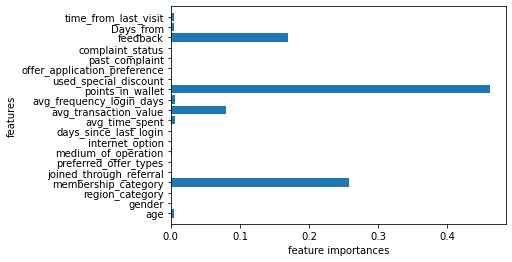

*************************************************
 더미변수 부스팅 특성 중요도
Feature: 0, Score: 0.00431
Feature: 1, Score: 0.00067
Feature: 2, Score: 0.00685
Feature: 3, Score: 0.11032
Feature: 4, Score: 0.00561
Feature: 5, Score: 0.45420
Feature: 6, Score: 0.00625
Feature: 7, Score: 0.00682
Feature: 8, Score: 0.00047
Feature: 9, Score: 0.00052
Feature: 10, Score: 0.00059
Feature: 11, Score: 0.00049
Feature: 12, Score: 0.00012
Feature: 13, Score: 0.08345
Feature: 14, Score: 0.02748
Feature: 15, Score: 0.06728
Feature: 16, Score: 0.02286
Feature: 17, Score: 0.02060
Feature: 18, Score: 0.04125
Feature: 19, Score: 0.00021
Feature: 20, Score: 0.00010
Feature: 21, Score: 0.00032
Feature: 22, Score: 0.00016
Feature: 23, Score: 0.00026
Feature: 24, Score: 0.00019
Feature: 25, Score: 0.00035
Feature: 26, Score: 0.00034
Feature: 27, Score: 0.00082
Feature: 28, Score: 0.00005
Feature: 29, Score: 0.00013
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00005
Feature: 32, Score: 0.00009
Feature: 33, Score:

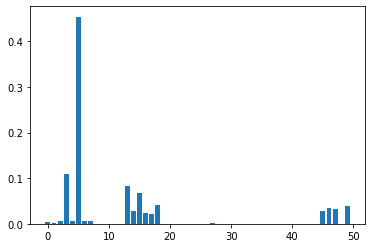

In [239]:
#변수 중요도 확인
from matplotlib import pyplot
print("부스팅 특성 중요도")
importance = boosting_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

# print("*******************************************************")




# 특성 중요도
# print("부스팅 특성 중요도 : \n{}".format(boosting_model.feature_importances_))

# 특성 중요도 시각화 하기
plot_feature_importances(boosting_model)
print("*************************************************")

# 특성 중요도
# print("더미변수 부스팅 특성 중요도 : \n{}".format(d_boosting_model.feature_importances_))

# 특성 중요도 시각화 하기
# plot_feature_importances(d_boosting_model)

print(" 더미변수 부스팅 특성 중요도")
d_importance = d_boosting_model.feature_importances_
for i,v in enumerate(d_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(d_importance))], d_importance)
pyplot.show()




In [ ]:
# best_estimator : 평가할 하나의 model 유형 
# n_estimators : Bootstrapping 을 몇개 할래? (즉, 데이터셋을 몇개 만들래?)
# max_samples : train 으로 넣어준 데이터에서 몇% 를 샘플링할래?
# max_feature : feature 들 중에서, 최대 몇개의 feature 를 사용할까?
# oob_score : bagging 실행 시에, 데이터셋에 포함 안된 데이터로 성능 측정 여부




# base_estimator 객체, 기본값 = None
# 데이터 세트의 무작위 하위 집합에 맞는 기본 추정량입니다. None이면 기본 추정량은 DecisionTreeClassifier.

# n_estimators int, 기본값 = 10
# 앙상블의 기본 추정자 수입니다.

# max_samples int 또는 float, 기본값 = 1.0
# 각 기본 추정량을 훈련하기 위해 X에서 추출 할 샘플 수입니다 (기본적으로 대체 됨, bootstrap자세한 내용은 참조).

# int이면 max_samples샘플을 그립니다 .

# float이면 샘플을 그립니다 .max_samples * X.shape[0]

# max_features int 또는 float, 기본값 = 1.0
# 각 base estimator를 훈련시키기 위해 X에서 그릴 특성의 수입니다 (기본적으로 대체하지 않고 bootstrap_features자세한 내용은 참조).

# int이면 max_features기능을 그립니다 .

# 부동이면 피쳐를 그립니다 .max_features * X.shape[1]

# 부트 스트랩 부울, 기본값 = True
# 샘플이 대체로 그려 졌는지 여부. False이면 교체하지 않고 샘플링을 수행합니다.

# bootstrap_features bool, 기본값 = False
# 대체로 피쳐를 그릴 지 여부입니다.

# oob_score bool, 기본값 = False
# 일반화 오류를 추정하기 위해 out-of-bag 샘플을 사용할지 여부입니다. bootstrap = True 인 경우에만 사용할 수 있습니다.

# warm_start bool, 기본값 = False
# True로 설정하면 이전 호출의 솔루션을 다시 사용하여 앙상블에 더 많은 추정량을 추가하고, 그렇지 않으면 완전히 새로운 앙상블에 적합합니다. 용어집을 참조하십시오 .

# 버전 0.17의 새로운 기능 : warm_start 생성자 매개 변수.

# n_jobs int, 기본값 = None
# fit및에 대해 병렬로 실행할 작업 수입니다 predict. 문맥이 None아닌 한 1을 의미합니다 joblib.parallel_backend. -1모든 프로세서를 사용하는 것을 의미합니다. 자세한 내용은 용어집 을 참조하십시오.

# random_state int, RandomState 인스턴스 또는 None, 기본값 = None
# 원본 데이터 세트의 무작위 리샘플링을 제어합니다 (샘플 및 기능별). 기본 추정기가 random_state속성을 수락 하면 앙상블의 각 인스턴스에 대해 다른 시드가 생성됩니다. 여러 함수 호출에서 재현 가능한 출력을 위해 int를 전달합니다. 용어집을 참조하십시오 .

# verbose int, 기본값 = 0
# 피팅 및 예측시 자세한 정도를 제어합니다.